In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')

C:\Users\dcald\AppData\Local\Temp\ipykernel_20384\287827001.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('critical_snr.txt', delim_whitespace=True, header=None, encoding="utf-16")


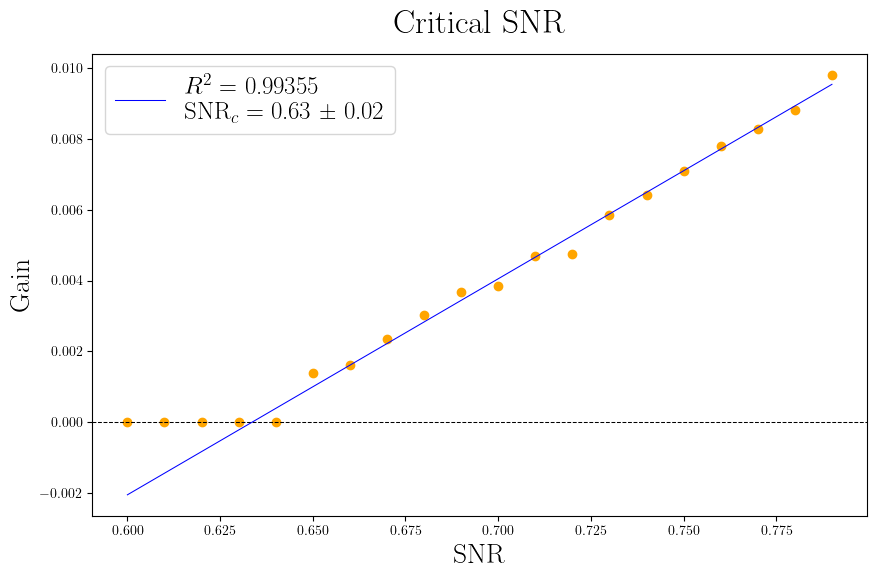

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the dataset
data = pd.read_csv('critical_snr.txt', delim_whitespace=True, header=None, encoding="utf-16")
data.columns = ['SNR', 'Gain']

# Full dataset arrays (for plotting)
X = data['SNR'].values
Y = data['Gain'].values

# Create a subset for regression (excluding the first 3 elements)
data_reg = data.iloc[4:]
X_reg = data_reg['SNR'].values
Y_reg = data_reg['Gain'].values

# Compute regression on the subset
slope, intercept, r_value, p_value, slope_std_err = linregress(X_reg, Y_reg)

# Generate predicted values using the regression parameters for the full range of SNR
Y_pred = slope * X + intercept

# Estimate intercept uncertainty using standard error propagation on the subset
n = len(X_reg)
X_mean = np.mean(X_reg)
# Calculate the sum of squares for the subset
S_xx = np.sum((X_reg - X_mean) ** 2)
intercept_std_err = slope_std_err * np.sqrt(np.sum(X_reg**2) / n)

# Compute zero-crossing point and its uncertainty
X_zero = -intercept / slope
X_zero_uncertainty = np.abs(1 / slope) * np.sqrt(intercept_std_err**2 + (X_zero * slope_std_err)**2)

# Generate the scatter plot with the full dataset
plt.figure(figsize=(10, 6))
plt.scatter(data['SNR'], data['Gain'], color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=0.75)

# Plot the regression model
plt.plot(data['SNR'], Y_pred, 
         label=f'$R^2$ = {r_value**2:.5f}\n'
               rf'SNR$_c =$ {X_zero:.2f} ± {X_zero_uncertainty:.2f}',
         color='blue', linewidth=0.75)

# Adding labels, title, and legend
plt.title(r'Critical SNR', fontsize=24, pad=15)
plt.xlabel('SNR', fontsize=20)
plt.ylabel('Gain', fontsize=20)
plt.legend(fontsize=18)

# Display the plot
#plt.show()
plt.savefig('critical_snr.pdf',format='pdf')
